# Project: Investigate a Dataset - Crime Data of Montgomery, USA

## TABLE OF CONTENTS

<li><a href="#intro"> Introduction</a></li>

<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#visual">Exploratory Data Analysis</a></li>
  <ul>
      <li><a href="#visual1"> Question 1(With Count Plot)</a>
      <li><a href="#visual2"> Question 2(With Count Plot)</a>
      <li><a href="#visual3"> Question 3(With Count Plot)</a>
      <li><a href="#visual4"> Question 4(With Count Plot)</a>
      <li><a href="#visual5"> Question 5(With Count Plot)</a>
      <li><a href="#visual6"> Question 6(With Count Plot)</a>
      <li><a href="#visual7"> Question 7(With Bar Chart)</a>
      <li><a href="#visual8"> Question 8(With Bar Chart)</a>
      <li><a href="#visual9"> Question 9(With Bar Chart)</a>
   <ul>
       
<li><a href="#coda">Conclusions</a></li>

<li><a href="#lim">Limitations</a></li>

<a id= 'intro'></a>

 ## INTRODUCTION

The data being analysed is the crime data of Montgomery,USA.

It contains over 300,000 crimes that had been discovered in the state. Revealing authentic and useful information the crime, agencies involved, the police district information, Sector. In this report, Montgomery crime data will be wrangled (cleaned) and analysed.

The data set also has 15 columns in use after cleaning with delimiters "," that seperates various values. We will read the data within the first two code blocks.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

from scipy import stats

%matplotlib inline

Below, I access the data in the crime file

In [2]:
crime_df = pd.read_csv('Crime.csv', low_memory = False)

## Questions for Analysis

In this analysis, the following questions will be answered:

1. How many victims were recorded all crime incidence?

2. Which Police Department Number occurs most and least?

3. Which Police Department Name has the highest and the lowest crime rate for each sort of crime?

4. Which Sector has the highest and the lowest crime rate?

5. Which are the agencies with the highest and lowest affliation with each sort of crime?

6. Which are the sector with the highest and lowest affliation with each sort of crime?

7. Which are the Police Department Name with the highest and lowest affliation with each sort of crime?

8. Cities most and least attached to crimes are?

9. Which Agency has the most involvement and the least involvement in all crimes?

Beneath, we see the details of the file. The output shows us some useful information gleaned from the crimes in state, Montgomery, United States of America.

In [3]:
crime_df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201219928,1204,180063894,12/21/2018 09:13:13 PM,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,...,NaN,GEORGIA,NaN,AVE,12/21/2018 09:13:00 PM,NaN,39.036270,-77.049900,4D,"(39.0363, -77.0499)"
1,201301798,5016,200035833,09/13/2020 12:26:58 AM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,COLTRANE,NaN,DR,08/08/2020 05:10:00 PM,08/08/2020 12:00:00 AM,39.277840,-77.211500,5D,"(39.2778, -77.2115)"
2,201221577,5404,190000342,01/03/2019 02:48:47 AM,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,...,N,GRANDIN,NaN,AVE,01/03/2019 02:48:00 AM,01/03/2019 02:48:00 AM,39.086688,-77.144754,1D,"(39.0867, -77.1448)"
3,201221577,9053,190000342,01/03/2019 02:48:47 AM,90Z,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,ROCKVILLE,...,N,GRANDIN,NaN,AVE,01/03/2019 02:48:00 AM,01/03/2019 02:48:00 AM,39.086688,-77.144754,1D,"(39.0867, -77.1448)"
4,201294935,2303,200027681,07/16/2020 05:29:50 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,...,NaN,FREDERICK,NaN,RD,07/16/2020 05:29:00 PM,NaN,39.198295,-77.244900,5D,"(39.1983, -77.2449)"


In [4]:
def create_bar_chart(orientation = 'x', variable=None, variable_name=None, order=None, descending=False, rotate_labels=False):
    """Function to create a bar chart by simply inputing the variable, variable_name, and order"""
    base_color = sns.color_palette()[0]
    
    # so that the function can access the dataframe
    global crime_df
    
    # Ordering 
    if descending == True:
        crime_df = crime_df.sort_values(variable, ascending=False)
    
    # Orientation for x
    if orientation == 'x':
        sns.countplot(data=crime_df, x=variable, color=base_color, order=order)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        # get the current tick locations and labels
        locs, labels = plt.xticks() 

        # loop through each pair of locations and labels
        for loc, label in zip(locs, labels):

            # get the text property for the label to get the correct count
            crime_counts = crime_df[variable].value_counts()
            count = crime_counts[label.get_text()]
            n_crimes = crime_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_crimes)

            # print the annotation just below the top of the bar
            plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')
    
    # Orientation for y
    if orientation == 'y':
        sns.countplot(data=crime_df, y=variable, color=base_color, order=order)
        plt.ylabel(variable_name)
        plt.xlabel('Count')
        
        variable_counts = crime_df[variable].value_counts()
        
        for i in range (variable_counts.shape[0]):
            count = variable_counts[i]
            # Convert count into a percentage, and then into string
            n_crimes = crime_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_crimes)
            # Print the string value on the bar. 
            plt.text(count+100, i, pct_string, va='center', color='black')

    # To rotate the labels when required
    if rotate_labels == True:
        plt.xticks(rotation=90)
        
    # To generate an automatic title when required
    plt.title(f'Bar Chart of {variable_name} Distribution')

After having a closer look at the data, I trimmed the columns. And removed those irregular patterns and redundant information below. The inplace function makes changes permanent on the dataset.

In [5]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319468 entries, 0 to 319467
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             319468 non-null  int64  
 1   Offence Code            319468 non-null  object 
 2   CR Number               319468 non-null  int64  
 3   Dispatch Date / Time    270287 non-null  object 
 4   NIBRS Code              319468 non-null  object 
 5   Victims                 319468 non-null  int64  
 6   Crime Name1             319177 non-null  object 
 7   Crime Name2             319177 non-null  object 
 8   Crime Name3             319177 non-null  object 
 9   Police District Name    319375 non-null  object 
 10  Block Address           292391 non-null  object 
 11  City                    318193 non-null  object 
 12  State                   319468 non-null  object 
 13  Zip Code                316286 non-null  float64
 14  Agency              

<a id= 'wrangling'></a>

## DATA WRANGLING

In [6]:
crime_df.drop(['Block Address', 'Latitude', 'Longitude', 'Incident ID', 'Dispatch Date / Time', 'Offence Code','Zip Code',
               'PRA', 'Address Number', 'Street Name', 'Location', 'Start_Date_Time', 'End_Date_Time'],
               axis=1, inplace=True)

Now, we will have quick glance at what the dataset looks like.

In [7]:
crime_df

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Prefix,Street Suffix,Street Type,Police District Number
0,180063894,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,SILVER SPRING,MD,MCPD,Street - Bus Stop,L,4L2,NaN,NaN,AVE,4D
1,200035833,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,DAMASCUS,MD,MCPD,Parking Lot - Residential,M,5M2,NaN,NaN,DR,5D
2,190000342,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - In vehicle,A,1A3,N,NaN,AVE,1D
3,190000342,90Z,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - Other,A,1A3,N,NaN,AVE,1D
4,200027681,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,GERMANTOWN,MD,MCPD,Retail - Department/Discount Store,M,5M1,NaN,NaN,RD,5D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319463,220046742,90Z,1,Other,All Other Offenses,POLICE INFORMATION,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCPD,Street - In vehicle,R,6R3,NaN,NaN,RD,6D
319464,220046795,23H,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,WHEATON,SILVER SPRING,MD,MCPD,Residence - Single Family,K,4K2,NaN,NaN,AVE,4D
319465,220046615,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,TAKOMA PARK,MD,MCPD,Residence - Single Family,H,3H1,NaN,NaN,AVE,3D
319466,220046870,26F,1,Crime Against Property,Identity Theft,IDENTITY THEFT,BETHESDA,BETHESDA,MD,MCPD,Other/Unknown,E,2E2,NaN,NaN,CT,2D


### VIEWING NULL VALUES IN THE COLUMNS
The next step to make the data more valid is to go through all rows and columns that have void inputs and handle them appropriately.

In [8]:
crime_df.isna().sum()

CR Number                      0
NIBRS Code                     0
Victims                        0
Crime Name1                  291
Crime Name2                  291
Crime Name3                  291
Police District Name          93
City                        1275
State                          0
Agency                         0
Place                          0
Sector                      1897
Beat                        1897
Street Prefix             305152
Street Suffix             314012
Street Type                  344
Police District Number         0
dtype: int64

Perusing the details of the null values, the Street Prefix and Street Suffix have an astronomical amount of null values. Thus, they will be dropped.

In [9]:
crime_df.drop(['Street Prefix','Street Suffix'],axis=1, inplace=True)

In [10]:
crime_df[crime_df['Crime Name1'].isna()]

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
216,210004591,26G,1,NaN,NaN,NaN,CITY OF TAKOMA PARK,TAKOMA PARK,MD,TPPD,Residence - Apartment/Condo,T,8T2,AVE,8D
1481,220020584,26G,1,NaN,NaN,NaN,WHEATON,ROCKVILLE,MD,MCPD,Residence - Single Family,K,4K2,DR,4D
1486,210046591,90Z,1,NaN,NaN,NaN,SILVER SPRING,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,I,3I1,CIR,3D
2389,210027720,35A,1,NaN,NaN,NaN,SILVER SPRING,SILVER SPRING,MD,MCPD,Parking Lot - County,G,3G1,AVE,3D
2528,210044586,26G,1,NaN,NaN,NaN,SILVER SPRING,BURTONSVILLE,MD,MCPD,Residence -Townhouse/Duplex,I,3I2,TER,3D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317744,220023011,26G,1,NaN,NaN,NaN,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCPD,Cyberspace,R,6R3,LA,6D
317903,220030342,90Z,1,NaN,NaN,NaN,SILVER SPRING,SILVER SPRING,MD,MCPD,Residence - Single Family,I,3I1,AVE,3D
318719,220042101,26G,1,NaN,NaN,NaN,BETHESDA,BETHESDA,MD,MCPD,Cyberspace,D,2D2,AVE,2D
319122,220042116,26G,1,NaN,NaN,NaN,GERMANTOWN,GERMANTOWN,MD,MCPD,Other/Unknown,N,5N1,CT,5D


Gazing at the output above, we can see the three columns (CrimeName1, CrimeName2, CrimeName3) and Police District Number all have null values in the same offence row. so, we will drop them to remove any unknown values in the data

In [11]:
crime_df.dropna(subset=['Crime Name1','Crime Name2','Crime Name3'],how='all', inplace=True)
crime_df.dropna(subset=['Police District Number'],how='all', inplace=True)

We look at the cities with null values below.

Below, we can see that their are some cities rows that have null values.

In [12]:
crime_df[crime_df['City'].isna()][:70]

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
39,200030712,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,CITY OF TAKOMA PARK,NaN,MD,TPPD,Parking Lot - Commercial,T,8T3,BLV,8D
202,210004042,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,CITY OF TAKOMA PARK,NaN,MD,TPPD,Retail - Drug Store/Pharmacy,T,8T3,BLV,8D
203,210004027,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,CITY OF TAKOMA PARK,NaN,MD,TPPD,Retail - Drug Store/Pharmacy,T,8T3,BLV,8D
223,210005057,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,CITY OF TAKOMA PARK,NaN,MD,TPPD,Convenience Store,T,8T3,BLV,8D
231,210005278,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,CITY OF TAKOMA PARK,NaN,MD,TPPD,Retail - Drug Store/Pharmacy,T,8T3,BLV,8D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26726,210029534,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,NaN,NaN,MD,TPPD,Restaurant,T,8T1,AVE,8.0D
27036,210025312,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),CITY OF TAKOMA PARK,NaN,MD,TPPD,Parking Lot - Commercial,T,8T3,BLV,8D
27287,210029576,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD (DESCRIBE OFFENSE),SILVER SPRING,NaN,MD,MCPD,Residence - Apartment/Condo,G,3G1,DR,3D
28430,200031298,120,1,Crime Against Property,Robbery,ROBBERY - STRONG ARM,SILVER SPRING,NaN,MD,MCPD,Commercial - Office Building,G,3G1,ST,3D


### REPLACING NULL VALUES

Below, we will fix all misspelt city in the data

In [13]:
crime_df['City'] = crime_df['City'].replace({'SILVERS SPRING':'SILVER SPRING', 'ROCKVIILE': 'ROCKVILLE', 'ROCKVILLLE':'ROCKVILLE','BETHEDA':'BETHESDA', 'GAIHTERSBURG':'GAITHERSBURG'})

So, we fix in the City name based on Police District Name because they are intertwined and closely related to eachother.

In [14]:
my_dict = {'CITY OF TAKOMA PARK' : 'TAKOMA PARK', 'SILVER SPRING' : 'SILVER SPRING'} 
for i, j in my_dict.items():
   if[crime_df['Police District Name'] == i]: 
     crime_df['City'] = crime_df['City'].fillna(j)

From the data output below and even in the data as a whole, we can see that the Police District Number doesn't have a speific City. Thus, we willdrop all null  Police District Numbers

In [15]:
crime_df.tail(10)

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
319458,220046803,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,SILVER SPRING,MD,MCPD,Parking Lot - Commercial,G,3G1,DR,3D
319459,220046835,23H,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,ROCKVILLE,POTOMAC,MD,MCPD,Street - Residential,B,1B1,RD,1D
319460,220045764,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,WHEATON,SILVER SPRING,MD,MCPD,Street - In vehicle,L,4L1,AVE,4D
319461,220045969,90Z,1,Other,All Other Offenses,SUICIDE - ATTEMPT,WHEATON,BROOKEVILLE,MD,MCPD,Residence - Other,J,4J2,RD,4D
319462,220046652,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Retail - Hardware,P,6P3,RD,6D
319463,220046742,90Z,1,Other,All Other Offenses,POLICE INFORMATION,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCPD,Street - In vehicle,R,6R3,RD,6D
319464,220046795,23H,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,WHEATON,SILVER SPRING,MD,MCPD,Residence - Single Family,K,4K2,AVE,4D
319465,220046615,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,TAKOMA PARK,MD,MCPD,Residence - Single Family,H,3H1,AVE,3D
319466,220046870,26F,1,Crime Against Property,Identity Theft,IDENTITY THEFT,BETHESDA,BETHESDA,MD,MCPD,Other/Unknown,E,2E2,CT,2D
319467,220046906,13A,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L1,WAY,4D


In [16]:
crime_df.isna().sum()

CR Number                    0
NIBRS Code                   0
Victims                      0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Police District Name        93
City                         0
State                        0
Agency                       0
Place                        0
Sector                    1895
Beat                      1895
Street Type                344
Police District Number       0
dtype: int64

From the displayed table below, we can see that the Sector and Beat columns have null values in akin and similar rows.

In [17]:
crime_df[crime_df['Sector'].isna()]

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
212,220000237,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,TAKOMA PARK,TAKOMA PARK,MD,TPPD,Retail - Other,NaN,NaN,AVE,TPPD
250,210027589,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,TAKOMA PARK,TAKOMA PARK,MD,TPPD,Convenience Store,NaN,NaN,BLV,TPPD
335,210039274,280,1,Crime Against Property,Stolen Property Offenses,STOLEN PROPERTY (DESCRIBE OFFENSE),TAKOMA PARK,TAKOMA PARK,MD,TPPD,Residence - Driveway,NaN,NaN,AVE,TPPD
378,210043513,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,TAKOMA PARK,TAKOMA PARK,MD,TPPD,Gas Station,NaN,NaN,AVE,TPPD
415,210037737,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,OTHER,SILVER SPRING,MD,MCPD,Street - In vehicle,NaN,NaN,AVE,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319246,220040851,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,TAKOMA PARK,TAKOMA PARK,MD,TPPD,Street - Residential,NaN,NaN,AVE,TPPD
319322,220044105,23H,1,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),TAKOMA PARK,TAKOMA PARK,MD,TPPD,Community Center,NaN,NaN,AVE,TPPD
319325,220044118,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,TAKOMA PARK,TAKOMA PARK,MD,TPPD,Convenience Store,NaN,NaN,AVE,TPPD
319343,220042824,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,TAKOMA PARK,TAKOMA PARK,MD,TPPD,Street - Residential,NaN,NaN,AVE,TPPD


In [18]:
crime_df.dropna(subset=['Street Type'],how='all', inplace=True)

In [19]:
crime_df.dropna(subset=['Sector','Beat',],how='all', inplace=True)

crime_df.dropna(subset=['Police District Name',],how='all', inplace=True)

We inspect the data to ensure that it is free of null and redundant inputs.

In [20]:
crime_df.isna().sum()

CR Number                 0
NIBRS Code                0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
City                      0
State                     0
Agency                    0
Place                     0
Sector                    0
Beat                      0
Street Type               0
Police District Number    0
dtype: int64

The data is now free from null values. We can now draw out authentic and factual information from it.

In [21]:
crime_df.head()

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
0,180063894,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,SILVER SPRING,MD,MCPD,Street - Bus Stop,L,4L2,AVE,4D
1,200035833,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,DAMASCUS,MD,MCPD,Parking Lot - Residential,M,5M2,DR,5D
2,190000342,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - In vehicle,A,1A3,AVE,1D
3,190000342,90Z,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - Other,A,1A3,AVE,1D
4,200027681,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,GERMANTOWN,MD,MCPD,Retail - Department/Discount Store,M,5M1,RD,5D


<a id= 'visual'></a>

## EXPLORATORY DATA ANALYSIS

<a id= 'visual1'></a>

### QUESTION 1: How many victims were recorded all crime incidence?

In [22]:
crime_df['Victims'].sum()

324064

From the results shown above, we can see there were slightly above three hundred thousand people, 324064, who were victims of crimes in Montgomery after July 1st 2016.

<a id= 'visual2'></a>

### QUESTION 2: Which Police Department Number occurs most and least?

In [23]:
crime_df['Police District Number'].value_counts()

3D    67057
4D    59865
6D    54794
2D    44734
1D    43183
5D    40818
8D     6394
Name: Police District Number, dtype: int64

Text(0.5, 1.0, 'Count Plot for Police District Number')

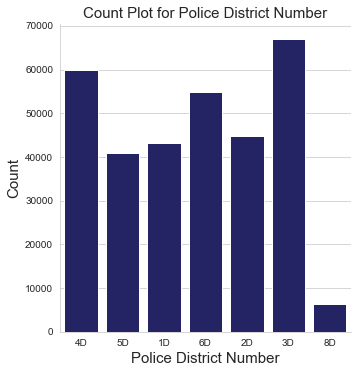

In [45]:
sns.catplot(x = 'Police District Number', data=crime_df, kind ='count', color='midnightblue')

plt.xlabel('Police District Number', size=15)
plt.ylabel('Count', size=15)
plt.title('Count Plot for Police District Number', size=15)

From the illustration depicted above, we can swiftly see that more crimes have been associated with the Police District Number '3D'. And Police District Number '8D' is the least associated with crimes.

In [26]:
#We make a function to generate count plots and keys

def cat_plot(variable=None, variable_key=None, variable_key_order=None, variable_order=None):
    global crime_df
    
    
    sns.catplot(x=variable,data=crime_df, kind='count',hue=variable_key,hue_order=variable_key_order,aspect = 2, order=variable_order,legend=False)
    plt.legend(loc='upper right')
    plt.title(f'Count plot of {variable} Distribution in relations to {variable_key}')
    plt.xlabel(variable, size=15)
    plt.ylabel('Count', size=15)  

    

<a id= 'visual3'></a>

### QUESTION 3: Which Police Department Name has the highest and the lowest crime rate for each sort of crime?

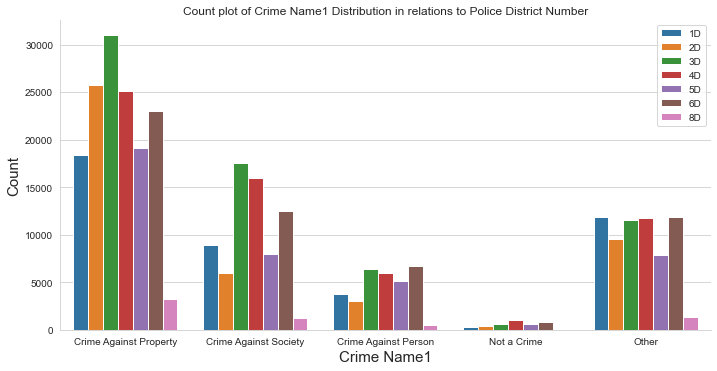

In [27]:
 cat_plot(variable = 'Crime Name1', variable_key = 'Police District Number', variable_key_order = ['1D','2D','3D','4D','5D','6D','8D'],
           variable_order=['Crime Against Property','Crime Against Society','Crime Against Person','Not a Crime','Other']
           )



From the graph pictured above, we can see that the crimes have been categorically grouped into 5 parts(Crime Against Property, Crime Against Society, Crime Against Person, Not a Crime, Other).

* The Police Distict Number that clinched the highest amount of Crime Against Property is '3D'. With '8D' Police Distict Number coming least'.
* The '3D' Police Distict Number also happens to be the one with the apex and highest amount of Crime Against Society. And '8D' with the lowest amount. 
* Crime Against Person has Police District Number '6D' recorded with the highest amount. And coming out with the smallest amount of Crime Against Person is 8D.
* Out of the all the crimes recorded, there were a few that were discovered to not be crimes. Every Police Distict Number had an ounce and fair share of this outcome.
* Police District number '4D' is the one with the highest of crimes that came solved as not being a crime. And 1D as the least number of 'not a crime' turnouts.
* The last section on the graph is 'Other' crimes. The graph shows that three Police Distict Number peaked that section(1D,4D and 6D) and has 8D has the lowest in section. 
* We can also see that the most rampant crime is Crime Against Property.


In [28]:
crime_df['Place'].value_counts()

Street - In vehicle                  34210
Residence - Single Family            33545
Residence - Apartment/Condo          30367
Other/Unknown                        26575
Street - Residential                 20709
                                     ...  
Dock/Wharf/Freight/Modal Terminal        4
Industrial Site                          4
Amusement Park                           3
Camp / Campground                        2
Rest Area                                1
Name: Place, Length: 99, dtype: int64

In [30]:
def create_group_bar(variable_x, variable_y, the_hue):
    global crime_df
    sns.set(style='white')

#create grouped bar chart
    sns.barplot(x=variable_x, y=variable_y, hue=the_hue,data=crime_df,
            palette=['purple', 'steelblue'])

#add overall title
    plt.title(f'Barchart for ${variable_x}', fontsize=16)

#add axis titles
    plt.xlabel(f'${variable_x}')
    plt.ylabel(f'${variable_y}')

#rotate x-axis labels
    plt.xticks(rotation=45)

In [31]:
crime_df.head()

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
0,180063894,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,SILVER SPRING,MD,MCPD,Street - Bus Stop,L,4L2,AVE,4D
1,200035833,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,DAMASCUS,MD,MCPD,Parking Lot - Residential,M,5M2,DR,5D
2,190000342,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - In vehicle,A,1A3,AVE,1D
3,190000342,90Z,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - Other,A,1A3,AVE,1D
4,200027681,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,GERMANTOWN,MD,MCPD,Retail - Department/Discount Store,M,5M1,RD,5D


<a id= 'visual4'></a>

### QUESTION 4: Which Sector has the highest and the lowest crime rate?

In [32]:
crime_df['Sector'].value_counts()

P    30731
A    30453
G    28157
D    24950
R    24065
L    23686
I    23159
N    21527
K    21159
E    19784
M    19291
H    15739
J    15020
B    12730
T     6394
Name: Sector, dtype: int64

Text(0.5, 1.0, 'Count Plot for Sector')

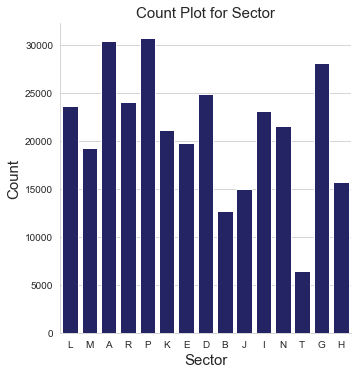

In [46]:
sns.catplot(x = 'Sector', data=crime_df, kind ='count', color='midnightblue')

plt.xlabel('Sector', size=15)
plt.ylabel('Count', size=15)
plt.title('Count Plot for Sector', size=15)

From the data above we see a chart that shows tha amount of crimes of each of the 15 Sectors. Coming dominant and highest among the sectors is Sector 'P', followed by Sector 'A'.

And coming least out of all the sectors is Sector 'T'.

<a id= 'visual5'></a>

### QUESTION 5: Which are the agencies with the highest and lowest affliation with each sort of crime?

<Figure size 720x1440 with 0 Axes>

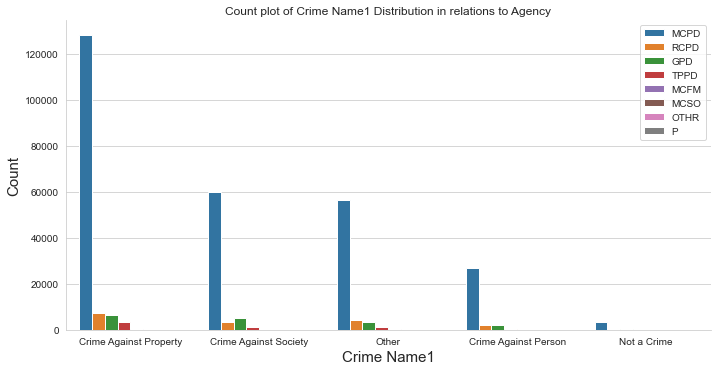

In [34]:
plt.figure(figsize=(10, 20))
cat_plot(variable='Crime Name1', variable_key='Agency', variable_key_order=None, variable_order=None)

The data above shows thw level at which each agency is involved with different kind of crimes. 

* In Crime Against Property, MCPD has the highest involvement and TPPD has the lowest involvement. While the rest have no involvements at all.
* In Crime Against Society, MCPD has the highest involvement and TPPD has the lowest involvement. While the rest have no involvements at all.
* Other crimes, has results akin and simlar to that of Crime Against Property and Crime Against Society.
* Crime Against Person, has only 3 agencies involovements(MCPD, RCDP, GPD). MCPD has the highest record of involvemnts in this crime and GPD with the least involvement. The other agncies have zero involvements.
* From the data displayed above, only MCPD had crimes that were later discovered not to be a crime.

In [35]:
crime_df['Agency'].value_counts()

MCPD    275312
GPD      17177
RCPD     17056
TPPD      6666
MCFM       600
MCSO        28
OTHR         4
P            2
Name: Agency, dtype: int64

<a id= 'visual6'></a>

### QUESTION 6: Which are the sector with the highest and lowest affliation with each sort of crime?

<Figure size 720x2160 with 0 Axes>

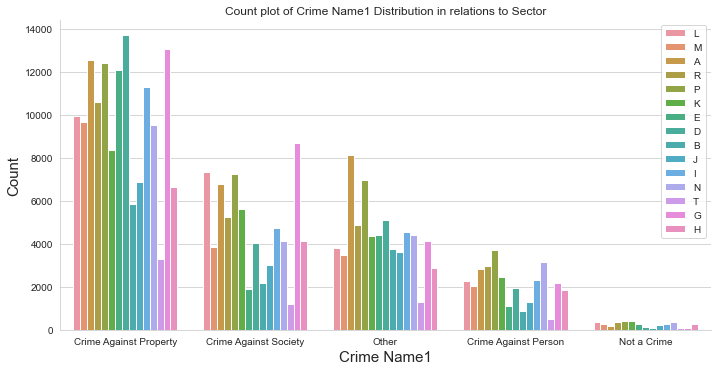

In [36]:
plt.figure(figsize=(10, 30))
cat_plot(variable='Crime Name1', variable_key='Sector', variable_key_order=None, variable_order=None)

From the depicted analysation above, we are looking at the relationship between sectors and crimes.

*From the data above, we can glean that the Sector peaking Crime Against Property is 'D'. taking the least amount in this crime is Sector 'T'.

*Looking at the Crime Against Society, we see that Sector 'G' has the topmost amount while Sector 'T' has the least amount of this crime.

*Glancing at the data, we see that 'Other' crimes as Sector 'A' as its highest and Sector 'T' has its lowest.

*In the graph atop, we see that Sector 'P' peaks above the other sectors in Crime Against Person with Sector 'T'.

*Looking at the last part of the visualisation above we can see that Sector 'K' while two sectors came lowest(Sector'G' and Sector 'T')'

In [37]:
crime_df.head()

,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,Street Type,Police District Number
0,180063894,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,SILVER SPRING,MD,MCPD,Street - Bus Stop,L,4L2,AVE,4D
1,200035833,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,DAMASCUS,MD,MCPD,Parking Lot - Residential,M,5M2,DR,5D
2,190000342,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - In vehicle,A,1A3,AVE,1D
3,190000342,90Z,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,ROCKVILLE,ROCKVILLE,MD,RCPD,Street - Other,A,1A3,AVE,1D
4,200027681,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,GERMANTOWN,MD,MCPD,Retail - Department/Discount Store,M,5M1,RD,5D


<a id= 'visual7'></a>

### QUESTION 7: Which are the Police Department Name with the highest and lowest affliation with each sort of crime?

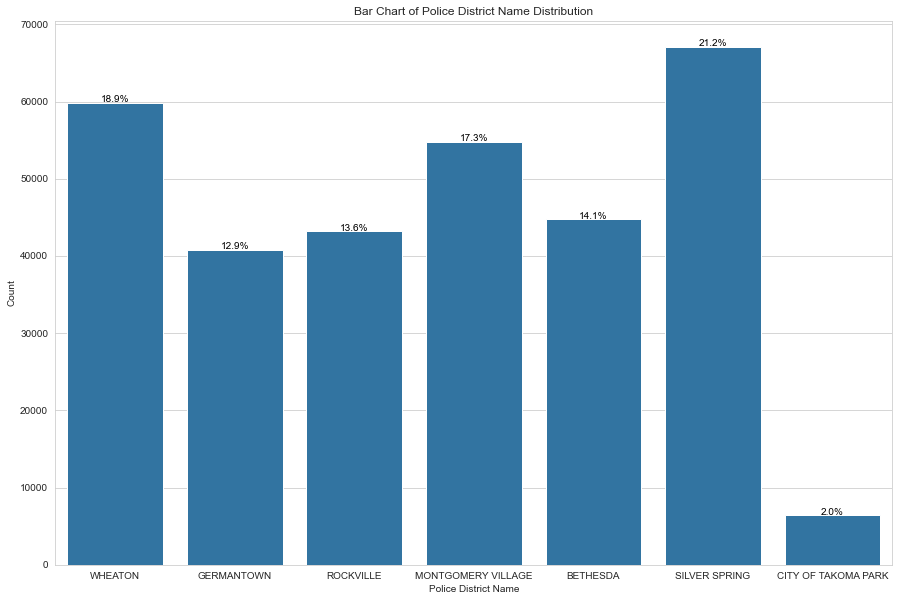

In [38]:
plt.figure(figsize=(15, 10))
create_bar_chart(orientation='x', variable='Police District Name', variable_name='Police District Name')

The illustration displayed above gives us a glaring amount of the Police District Names involved in crimes. We have 7 Police Ditrict Names. Coming atop others is 'SILVER SPRING' with 21.2% and coming least is 'CITY OF TAKOMA' garnering only 2%.

<a id= 'visual8'></a>

### QUESTION 8:  Cities most and least attached to crimes are?

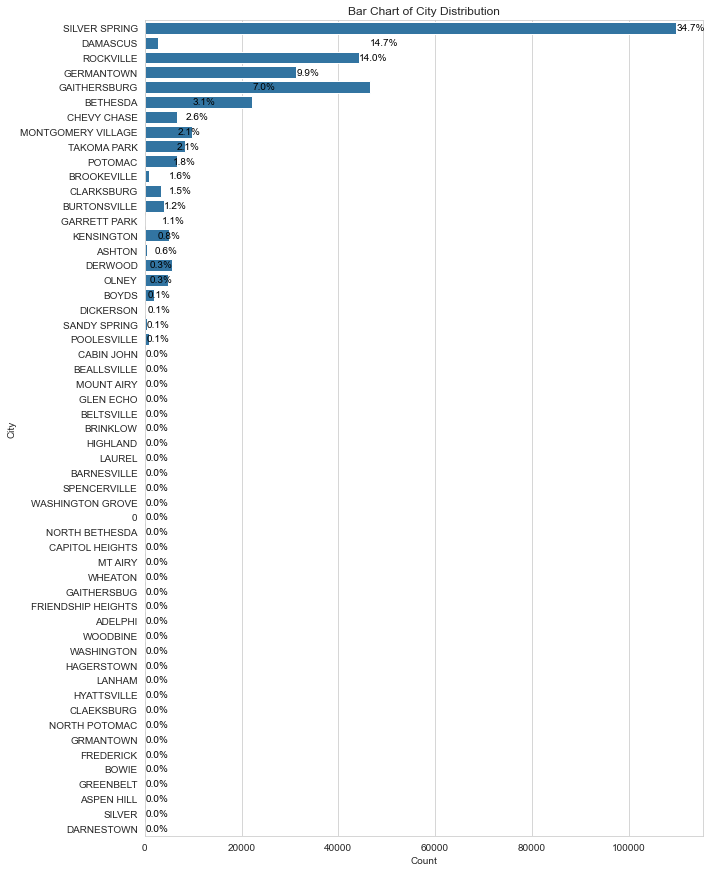

In [39]:
plt.figure(figsize=(10, 15))
create_bar_chart(orientation='y', variable='City', variable_name='City')

From the bar chart displayed above, we can see distribution of crimes in different cities in Montgomery. Coming apex on the list of cities of recorded crimes is SILVER SPRING with a staggering amount of 34.7%

And we see the least populated cities(ASHTON, CABIN JOHN, BEALLSVILLE,MOUNT AIRY, GLEN ECHO, BELTSVILLE, BRINKLOW, HIGHLAND, LAUREL, BARNESVILLE, SPENCERVILLE, WASHINGTON GROVE, 0, NORTH BETHESDA, CAPITOL HEIGHTS, MOUNT AIRY, WHEATON, GAITHERSBURG, FRIENDSHIP HEIGHTS, ADELPHI, WOODBINE, WASHINGTON, HAGERSTOWN, LANHAM, HYATTSVILLE, NORTH POTOMAC, GERMANTOWN, CLAEKSBURG). They have no crime percentage rate. 

In [40]:
crime_df['City'].unique()

array(['SILVER SPRING', 'DAMASCUS', 'ROCKVILLE', 'GERMANTOWN',
       'GAITHERSBURG', 'BETHESDA', 'CHEVY CHASE', 'MONTGOMERY VILLAGE',
       'TAKOMA PARK', 'POTOMAC', 'BROOKEVILLE', 'CLARKSBURG',
       'BURTONSVILLE', 'GARRETT PARK', 'KENSINGTON', 'ASHTON', 'DERWOOD',
       'OLNEY', 'BOYDS', 'DICKERSON', 'SANDY SPRING', 'POOLESVILLE',
       'CABIN JOHN', 'BEALLSVILLE', 'MOUNT AIRY', 'GLEN ECHO',
       'BELTSVILLE', 'BRINKLOW', 'HIGHLAND', 'LAUREL', 'BARNESVILLE',
       'SPENCERVILLE', 'WASHINGTON GROVE', '0', 'NORTH BETHESDA',
       'CAPITOL HEIGHTS', 'MT AIRY', 'WHEATON', 'GAITHERSBUG',
       'FRIENDSHIP HEIGHTS', 'ADELPHI', 'WOODBINE', 'WASHINGTON',
       'HAGERSTOWN', 'LANHAM', 'HYATTSVILLE', 'CLAEKSBURG',
       'NORTH POTOMAC', 'GRMANTOWN', 'FREDERICK', 'BOWIE', 'GREENBELT',
       'ASPEN HILL', 'SILVER', 'DARNESTOWN'], dtype=object)

<a id= 'visual9'></a>

### QUESTION 9: Which Agency has the most involvement and the least involvement in all crimes?

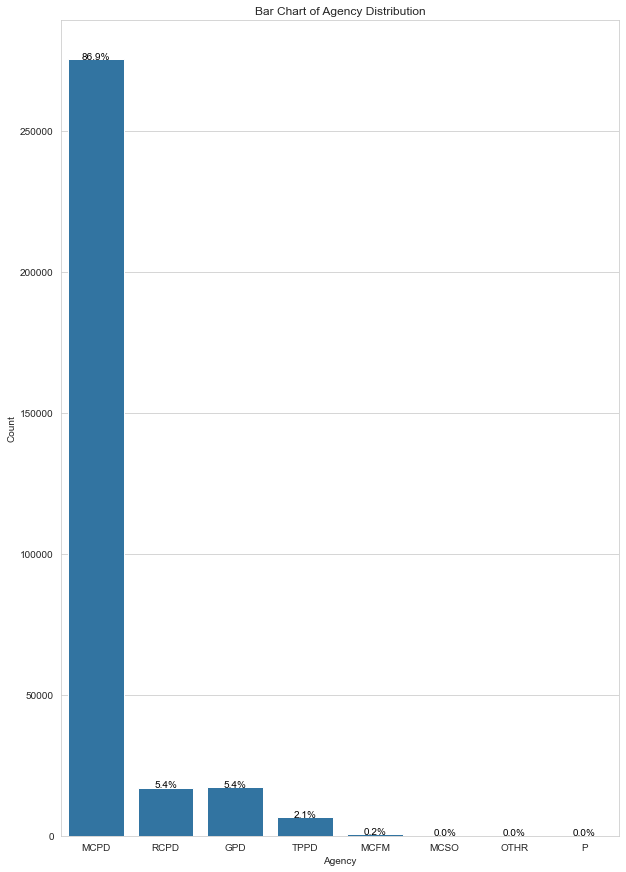

In [41]:
plt.figure(figsize=(10, 15))
create_bar_chart(orientation='x', variable='Agency', variable_name='Agency')

The chart above shows us a clear view of Agencies involvements in the crime of Montgomery. We see the percentage involvement of each agency. Coming highest is MCPD. Followed by RCPD and GPD racking the same amount of percentage. Coming behind these two is the 'TPPD'. The last agency an ounce amount of percentage is MCFM(0.2%).

<a id='coda'></a>

## CONCLUSIONS

After the analysis and visualizations made, it can be conluded that (from the data set):

Crime Against Property is the most occuring sort of crime.
Crime is most rampant in the city of Silver Spring'

Entities associated with crimes that have high involvements include:
* '3D' Police Distict Number
* Silver Spring City
* Silver Spring Police District Name
* Sector 'P'
* MCPD Agency

<a id='lim'></a>

## LIMITATIONS
1. I had to drop a lot of data rows as they had null values in Crime Name1, Crime Name2, Crime Name3, Police District Number columns
2. I had to remove Block Address, Latitude, Longitude, Incident ID, Dispatch Date / Time, Offence Code, Zip Code, PRA, Address Number, Street Name, Location columns.